In [7]:
from qiskit_aer import AerSimulator
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile
from qiskit.quantum_info import Operator

import matplotlib.pyplot as plt

import numpy as np

def visualize_result(res):
    n_qubit = len(list(res.keys())[0])
    for i in range(2 ** n_qubit):
        label ="{0:b}".format(i).rjust(n_qubit, '0')
        if not label in res.keys():
            res[label] = 0
    
    sorted_res = dict(sorted(res.items()))

    print(sorted_res)

    plt.title("Counts")
    plt.ylabel("Frequency")
    plt.xlabel("Measured State")
    plt.bar(sorted_res.keys(), sorted_res.values(), color='green')



{'00': 0, '01': 100000, '10': 0, '11': 0}


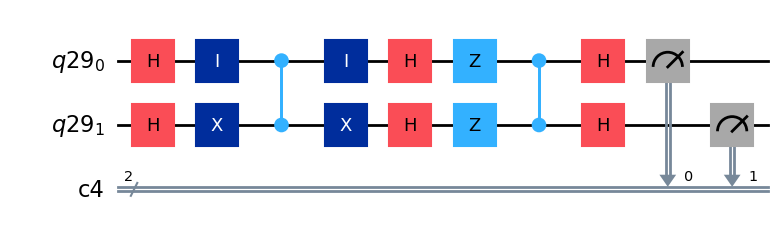

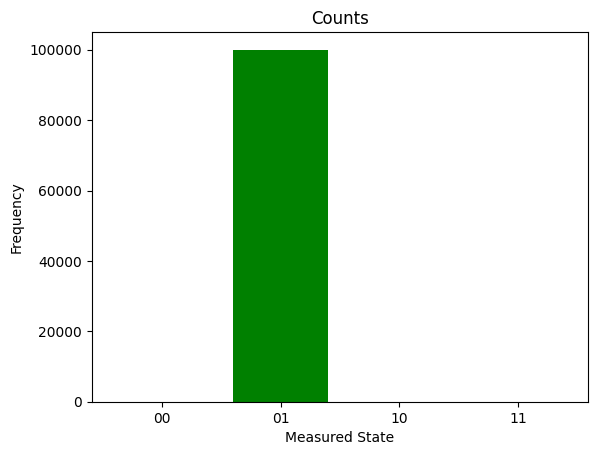

In [8]:
# circuit
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

qc = QuantumCircuit(qr, cr)

qc.h([0, 1])



qc.id(0)
qc.x(1)

qc.cz(1, 0)

qc.id(0)
qc.x(1)

qc.h([0, 1])

qc.z([0, 1])
qc.cz(1, 0)

qc.h([0, 1])

qc.measure(0, 0)
qc.measure(1, 1)

qc.draw(output='mpl')

# execution
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

sim_result = simulator.run(compiled_circuit, shots=100000).result()
counts = sim_result.get_counts()

#visualization
visualize_result(counts)
qc.draw(output='mpl')

{'00': 0, '01': 100000, '10': 0, '11': 0}


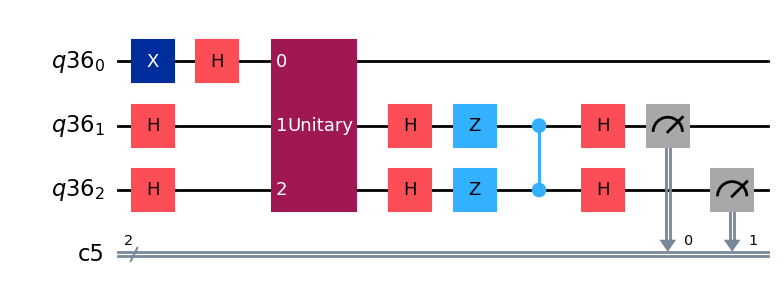

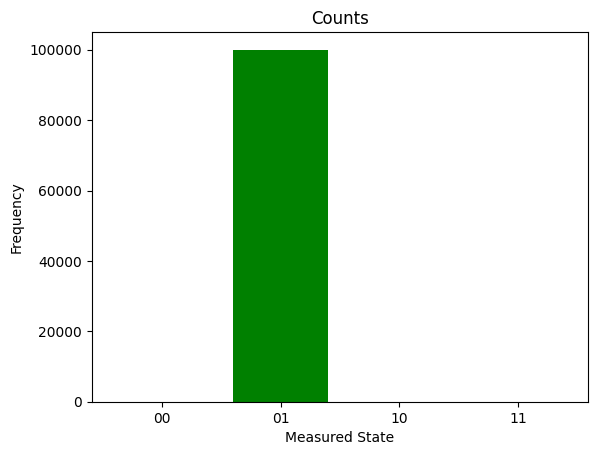

In [9]:
U_f = Operator(np.array([
    [1, 0, 0, 0, 0, 0, 0, 0], 
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, -1, 0, 0, 0, 0, 0],
    [0, 0, 0, -1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1],
    ]))


# circuit
qr = QuantumRegister(3)
cr = ClassicalRegister(2)

qc = QuantumCircuit(qr, cr)

qc.h([1, 2])

qc.x(0)
qc.h(0)

qc.append(U_f, [0, 1, 2], [], copy=False)


qc.h([1, 2])

qc.z([1, 2])
qc.cz(2, 1)

qc.h([1, 2])

qc.measure(1, 0)
qc.measure(2, 1)

qc.draw(output='mpl')

# execution
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

sim_result = simulator.run(compiled_circuit, shots=100000).result()
counts = sim_result.get_counts()

#visualization
visualize_result(counts)
qc.draw(output='mpl')